# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [254]:
import pandas as pd
import numpy as np
import matplotlib as mp

In [255]:
petrol = pd.read_csv("petrol.csv", header = 0, na_values = '?').dropna()
petrol.describe()

,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [256]:
petrol

,tax,income,highway,dl,consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [260]:
# from scipy.stats import stats
# petrol.sort_values()
q1 = petrol.quantile(.25)
q3 = petrol.quantile(.75)
IQR = q3 - q1
minimum_cap = q1 - 1.5 * IQR

maximum_cap = q3 + 1.5 * IQR
# print(petrol <minimum_cap) | (petrol > maximum_cap)

In [261]:
petrol_ol = petrol[~ ((petrol <minimum_cap) | (petrol > maximum_cap)).any(axis=1)]
print(petrol_ol)

     tax   income   highway     dl   consumption
0   9.00     3571      1976  0.525           541
1   9.00     4092      1250  0.572           524
2   9.00     3865      1586  0.580           561
3   7.50     4870      2351  0.529           414
4   8.00     4399       431  0.544           410
6   8.00     5319     11868  0.451           344
7   8.00     5126      2138  0.553           467
8   8.00     4447      8577  0.529           464
9   7.00     4512      8507  0.552           498
10  8.00     4391      5939  0.530           580
12  7.00     4817      6930  0.574           525
13  7.00     4207      6580  0.545           508
14  7.00     4332      8159  0.608           566
15  7.00     4318     10340  0.586           635
16  7.00     4206      8508  0.572           603
17  7.00     3718      4725  0.540           714
19  8.50     4341      6010  0.677           640
20  7.00     4593      7834  0.663           649
21  8.00     4983       602  0.602           540
22  9.00     4897   

# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

In [262]:
petrol_ol.corr()

,tax,income,highway,dl,consumption
tax,1.000000,-0.109537,-0.390602,-0.314702,-0.446116
income,-0.109537,1.000000,0.051169,0.150689,-0.347326
highway,-0.390602,0.051169,1.000000,-0.016193,0.034309
dl,-0.314702,0.150689,-0.016193,1.000000,0.611788
consumption,-0.446116,-0.347326,0.034309,0.611788,1.000000


In [ ]:
#Dl has a very strong positive corelation with target variable consumption. Tax column has a negative correlation with target variable

### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [263]:
X = petrol_ol[['tax',' dl']]
X

,tax,dl
0,9.00,0.525
1,9.00,0.572
2,9.00,0.580
3,7.50,0.529
4,8.00,0.544
6,8.00,0.451
7,8.00,0.553
8,8.00,0.529
9,7.00,0.552
10,8.00,0.530


In [264]:
Y = petrol_ol[[' consumption']]
Y

,consumption
0,541
1,524
2,561
3,414
4,410
6,344
7,467
8,464
9,498
10,580


# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [265]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2,random_state = 100)

In [266]:
print(X_train.shape)
print(X_test.shape)


(34, 2)
(9, 2)


# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [267]:
from sklearn import linear_model

regrr = linear_model.LinearRegression()
regrr.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [281]:
print("coefficients are: ",regrr.coef_)

print("Intercept is",regrr.intercept_)

coeff = pd.DataFrame( data = regrr.coef_.transpose(), index = X.columns, columns = ['Coefficient'])
coeff

coefficients are:  [[-33.0340044  871.22361982]]
Intercept is [332.60490143]


,Coefficient
tax,-33.034004
dl,871.223620


# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [282]:
print(regrr.score(X_train, y_train))
print(regrr.score(X_test,y_test))
sns.pairplot(petrol_ol[['tax',' income',' highway',' dl',' consumption']])

0.45101225121509564
0.07094251841069776


In [ ]:
#In testing R2 is .070, which is very low, so we should consider some more features in our model to get a better predicition.

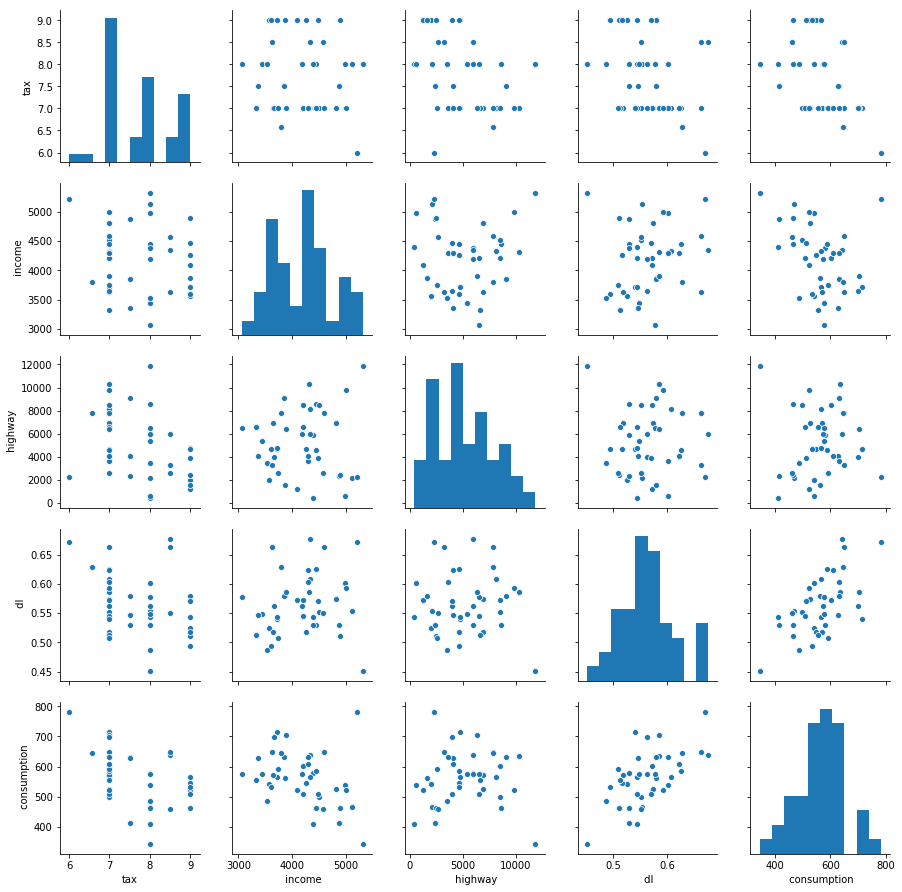

In [283]:
import seaborn as sns
sns.pairplot(petrol_ol[['tax',' income',' highway',' dl',' consumption']])

# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [284]:
X_new = petrol_ol[['tax',' dl',' income',' highway']]
X_new

X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new,Y, test_size = 0.2,random_state = 101)
from sklearn import linear_model

regrr_new = linear_model.LinearRegression()
regrr_new.fit(X_new_train,y_new_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [285]:
coeff_new = pd.DataFrame( data = regrr_new.coef_.transpose(), index = X_new.columns, columns = ['Coefficient'])
coeff_new

,Coefficient
tax,-27.345631
dl,821.501129
income,-0.077666
highway,-0.000305


In [286]:
print(regrr_new.score(X_new_train, y_new_train))
print(regrr_new.score(X_new_test,y_new_test))

0.6468662125530596
0.6287350988864818


# Question 9: Print the coefficients of the multilinear regression model

In [274]:
print(regrr_new.coef_)
print(regrr_new.intercept_)

[[-2.73456306e+01  8.21501129e+02 -7.76659441e-02 -3.04944626e-04]]
[636.86892978]


# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### *R squared value increase if we increase the number of independent variables to our analysis

In [ ]:
Value of R2 dependeps on the number of features (independent variables) in our model.
All variable which are having a correlation with target vaariable have an impact in the model accuracy. 
But if we have a large number of independent variables, we should not add varaibles which do not have a strong association with target variable because this may lead to an over fitting or
computation time will be more without actually getting any benifits in model performance.